<a href="https://colab.research.google.com/github/AhmedSaleh171/Thesis/blob/main/Uberset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install numpy==1.26.4 pandas==2.2.2 --quiet
# !pip install catboost --quiet
# !pip install streamlit --quiet

# After install: runtime --> restart session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import streamlit as st

df = pd.read_csv('https://raw.githubusercontent.com/AhmedSaleh171/Thesis/refs/heads/main/Uber_dynamic_pricing.csv')
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


#Data Viewing

In [3]:
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


Text(0.5, 0.98, 'Feature Distributions')

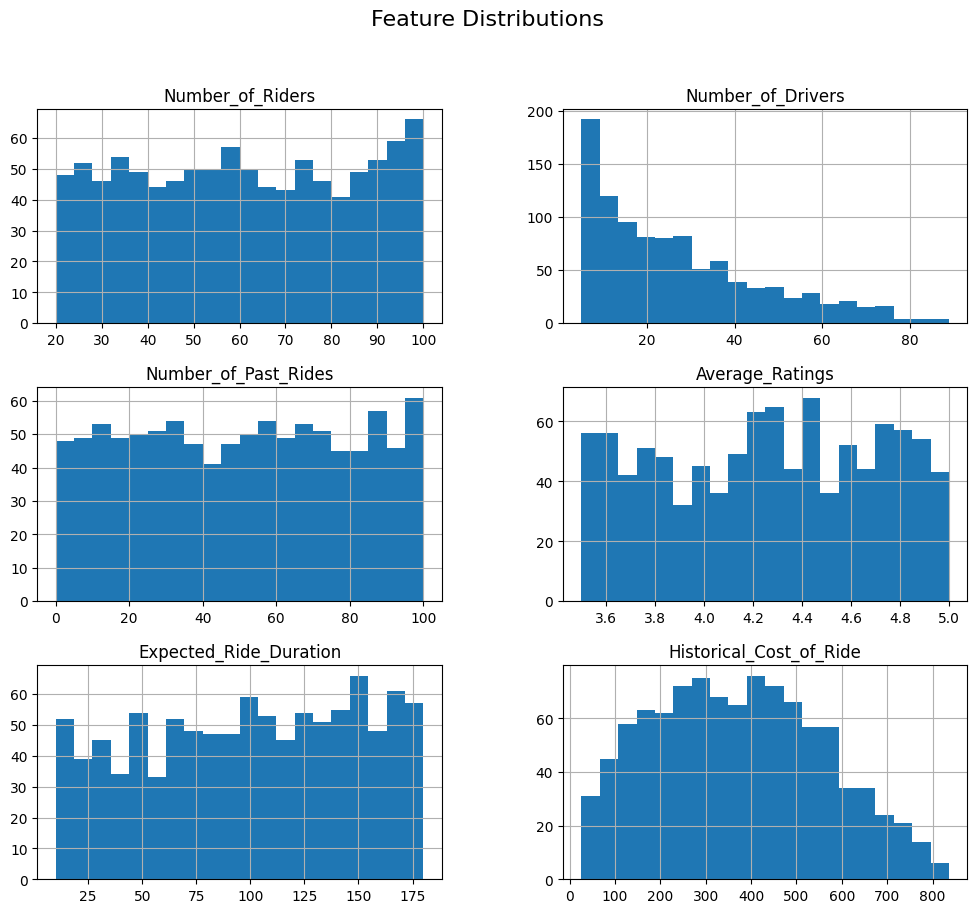

In [5]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)

Text(0.5, 1.0, 'Boxplot of Historical Ride Costs')

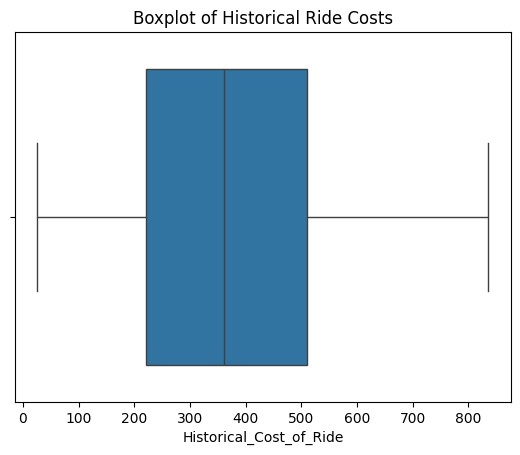

In [6]:
sns.boxplot(x=df['Historical_Cost_of_Ride'])
plt.title("Boxplot of Historical Ride Costs")

#Model

In [7]:
cat_features = ['Vehicle_Type', 'Location_Category', 'Customer_Loyalty_Status']

X = df.drop(columns=['Historical_Cost_of_Ride', 'Time_of_Booking'])
y = df['Historical_Cost_of_Ride']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

cat_model = CatBoostRegressor(iterations=115, learning_rate=0.05, depth=4, random_state=42, verbose=0)

cat_model.fit(X_train, y_train, cat_features=cat_features)

y_pred = cat_model.predict(X_test)



#Evaluation

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse_perc = (rmse / np.mean(y_test)) * 100
mae_perc = (mae / np.mean(y_test)) * 100
r2 = r2_score(y_test, y_pred) * 100

print(f"Root Mean Squared Error (RMSE): {rmse_perc:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_perc:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Root Mean Squared Error (RMSE): 17.88%
Mean Absolute Error (MAE): 13.72%
Mean Absolute Percentage Error (MAPE): 14.30%
R² Score: 87.19%


In [27]:
new_data = pd.DataFrame([{
    'Number_of_Riders': 72,
    'Number_of_Drivers': 97,
    'Location_Category': 'Urban',
    'Customer_Loyalty_Status': 'Gold',
    'Number_of_Past_Rides': 12,
    'Average_Ratings': 4.7,
    'Vehicle_Type': 'Premium',
    'Expected_Ride_Duration': 72
}, {
    'Number_of_Riders': 2,
    'Number_of_Drivers': 7,
    'Location_Category': 'Suburban',
    'Customer_Loyalty_Status': 'Gold',
    'Number_of_Past_Rides': 12,
    'Average_Ratings': 4.7,
    'Vehicle_Type': 'Premium',
    'Expected_Ride_Duration': 56
}, {
    'Number_of_Riders': 92,
    'Number_of_Drivers': 79,
    'Location_Category': 'Rural',
    'Customer_Loyalty_Status': 'Gold',
    'Number_of_Past_Rides': 12,
    'Average_Ratings': 4.7,
    'Vehicle_Type': 'Economy',
    'Expected_Ride_Duration': 82
}])

# Predict ride price for the new row
predicted_price = cat_model.predict(new_data)[0]
print(f"\nPredicted Ride Price for New Data: ${predicted_price:.2f}")
predicted_price = cat_model.predict(new_data)[1]
print(f"\nPredicted Ride Price for New Data: ${predicted_price:.2f}")
predicted_price = cat_model.predict(new_data)[2]
print(f"\nPredicted Ride Price for New Data: ${predicted_price:.2f}")


Predicted Ride Price for New Data: $308.12

Predicted Ride Price for New Data: $250.32

Predicted Ride Price for New Data: $282.51
